In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 기본 정보 확인

In [3]:
df = pd.read_csv('./data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### 1. 행/열 수 확인
- 행: 271116개
- 열: 15개

In [4]:
df.shape

(271116, 15)

### 2. 각 변수 이름, 타입, 결측치 여부 확인
- 결측치가 있는 컬럼: Age, Height, Weight, Medal
    - Medal에 결측치가 있는 이유: 메달을 못 딴 경우 모두 빈 칸으로 남겨뒀기 때문

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  str    
 2   Sex     271116 non-null  str    
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  str    
 7   NOC     271116 non-null  str    
 8   Games   271116 non-null  str    
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  str    
 11  City    271116 non-null  str    
 12  Sport   271116 non-null  str    
 13  Event   271116 non-null  str    
 14  Medal   39783 non-null   str    
dtypes: float64(3), int64(2), str(10)
memory usage: 31.0 MB


### 3. 기술 통계 및 데이터 요약

#### 3-1. 수치형 변수
- 기술 통계 값이 의미 없는 ID와 Year는 제외하고 출력
- Age 컬럼의 경우 중앙값이 평균값보다 약간 작으므로 분포가 약간 우측으로 쏠려있음을 알 수 있다.
- Height 컬럼과 Weight 컬럼의 경우 중앙값과 평균값이 거의 같으므로 고르게 분포해있다는 것을 알 수 있다.

In [6]:
df[['Age', 'Height', 'Weight']].describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


#### 3-2 범주형 변수
- Name 컬럼을 확인해보니 선수의 이름이 중복된 경우가 많다는 것을 확인할 수 있다. 이는 한 선수가 여러 종목에 중복 참여했거나 여러 해 출전했다는 것을 알 수 있다. 동명이인일 가능성도 배재할 수 없지만, full name을 기재하였기 때문에 그 가능성은 다소 낮다고 볼 수 있다.
- Sex 컬럼의 결과 남자가 여자의 약 2.5배인 것을 확인할 수 있다.
- 팀이름을 나타내는 Team 컬럼과 국가 코드를 나타내는 NOC 코드의 unique 개수가 같을줄 알았는데, Team 컬럼을 확인해보니 올림픽 초창기에 있는 연합팀 제도 때문에 두 나라가 다 기재되는 등 정확한 국가명이 기재되어 있지 않았다. 주제에 맞는 컬럼은 국가 고유 코드를 나타내는 NOC 컬럼이다.
- 2000년에 개최된 올림픽이 참가한 선수가 가장 많았다.
- Season 컬럼을 확인해보니 하계올림픽에 참가한 사람이 동계올림픽보다 압도적으로 많았다.
- 경기가 가장 많이 열린 개최 도시는 런던이다. 1908년, 1948년, 2012년 총 3번 개최했기 때문이다.
- 육상 종목이 가장 많이 열렸다.
- 남자 축구 종목의 참여 선수가 가장 많았다.
- 금, 은, 동 중 금메달이 가장 많이 수여되었다.

In [7]:
df.describe(include='str')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


### 4. 각 컬럼 세부 정보

#### 4-1. Name
- 한 선수가 여러 종목을 참가하거나, 여러 해 참가한 것을 추정해볼 수 있다.

In [8]:
df.value_counts('Name')

Name
Robert Tait McKenzie            58
Heikki Ilmari Savolainen        39
Joseph "Josy" Stoffel           38
Ioannis Theofilakis             36
Takashi Ono                     33
                                ..
Milan Zyka                       1
Yevgeny Aleksandrovich Zykov     1
James Francis "Jim" Zylker       1
Olga Igorevna Zyuzkova           1
Andrzej ya                       1
Name: count, Length: 134732, dtype: int64

#### 4-2. Sex
- 여성 참가자의 수가 남성 참가자의 수보다 적다는 것을 알 수 있다.

In [9]:
df.value_counts('Sex')

Sex
M    196594
F     74522
Name: count, dtype: int64

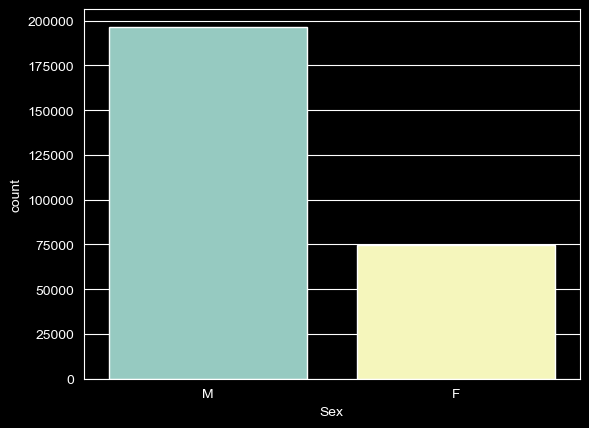

In [10]:
sns.countplot(x='Sex', data=df, hue='Sex')
plt.show()

#### 4-3. Age
- 20대 선수가 가장 많다는 것을 확인할 수 있고, 오른쪽 꼬리가 긴 분포임을 확인할 수 있다.
- violinplot을 그려보니 좌측으로 많이 치우친 그래프라 40대 이상은 모두 이상치라고 판단하고 있다.

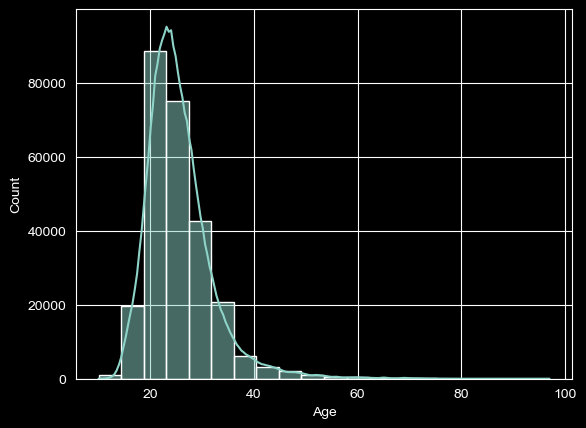

In [15]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.show()

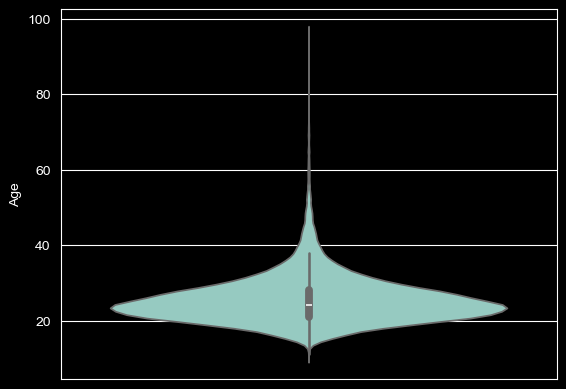

In [20]:
sns.violinplot(data=df, y='Age')
plt.show()

#### 4-4. Height
- 170과 180 사이에 가장 많이 분포해있음을 알 수 있다.
- 남성 참가자가 여성 참가자의 2.5배라 그런듯 하다.

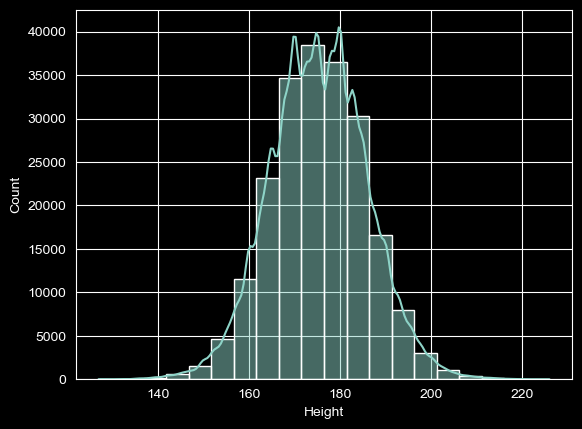

In [21]:
sns.histplot(df['Height'], bins=20, kde=True)
plt.show()

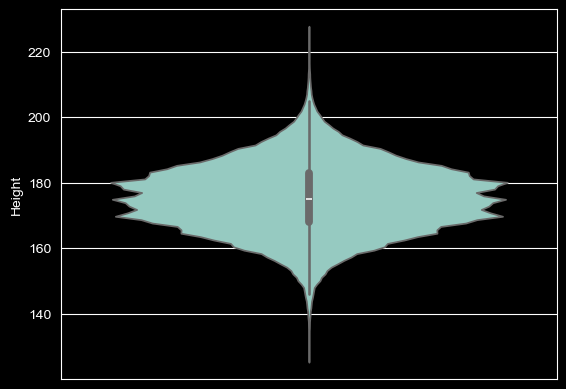

In [37]:
sns.violinplot(data=df, y='Height')
plt.show()

#### 4-5. Weight

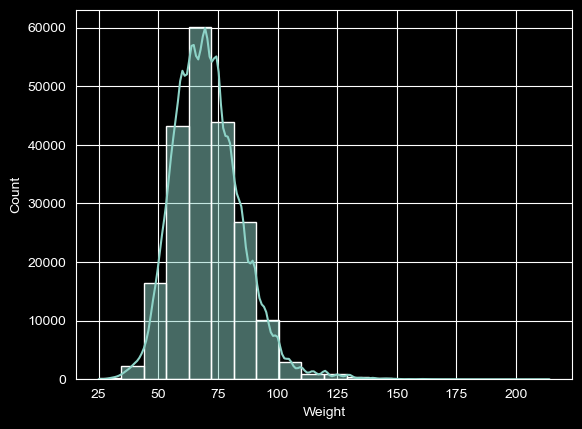

In [25]:
sns.histplot(df['Weight'], bins=20, kde=True)
plt.show()

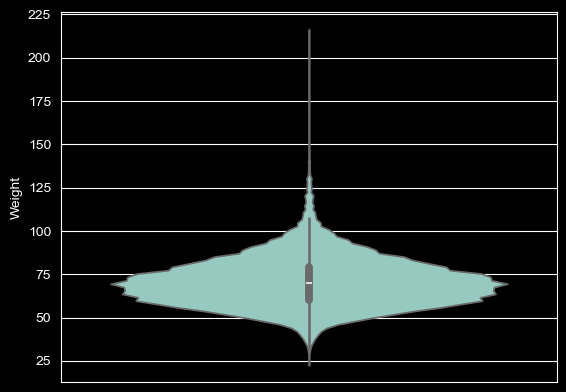

In [38]:
sns.violinplot(data=df, y='Weight')
plt.show()

#### 4-6. Team

In [27]:
df.value_counts('Team')

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Satchmo              1
Mainz                1
Solos Carex          1
Dow Jones            1
Digby                1
Name: count, Length: 1184, dtype: int64

#### 4-7. NOC

In [28]:
df.value_counts('NOC')

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
NBO        2
UNK        2
NFL        1
Name: count, Length: 230, dtype: int64

#### 4-8. Games

In [29]:
df.value_counts('Games')

Games
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
1992 Summer    12977
2012 Summer    12920
1988 Summer    12037
1972 Summer    10304
1984 Summer     9454
1976 Summer     8641
1968 Summer     8588
1952 Summer     8270
1960 Summer     8119
1964 Summer     7702
1980 Summer     7191
1936 Summer     6506
1948 Summer     6405
1924 Summer     5233
1956 Summer     5127
1928 Summer     4992
2014 Winter     4891
2010 Winter     4402
2006 Winter     4382
1920 Summer     4292
2002 Winter     4109
1912 Summer     4040
1998 Winter     3605
1992 Winter     3436
1994 Winter     3160
1908 Summer     3101
1932 Summer     2969
1988 Winter     2639
1984 Winter     2134
1900 Summer     1936
1968 Winter     1891
1976 Winter     1861
1964 Winter     1778
1980 Winter     1746
1906 Summer     1733
1972 Winter     1655
1956 Winter     1307
1904 Summer     1301
1960 Winter     1116
1952 Winter     1088
1948 Winter     1075
1936 Winter      895
1928 Wi

#### 4.9. Year

In [30]:
df.value_counts('Year')

Year
1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7480
1936     7401
1956     6434
1924     5693
1928     5574
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1932     3321
1994     3160
1908     3101
1900     1936
1906     1733
1904     1301
1896      380
Name: count, dtype: int64

#### 4.10. Season

In [31]:
df.value_counts('Season')

Season
Summer    222552
Winter     48564
Name: count, dtype: int64

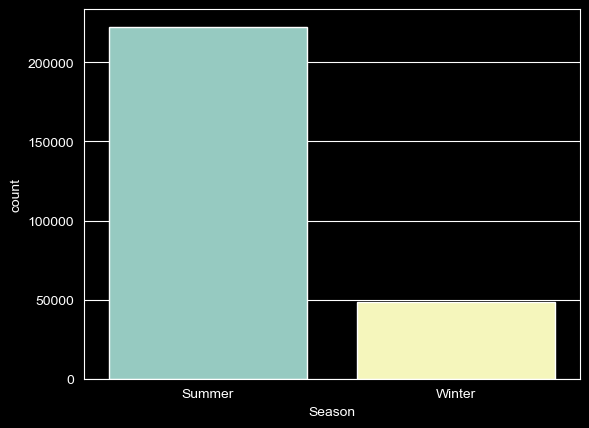

In [40]:
sns.countplot(x='Season', data=df, hue='Season')
plt.show()

#### 4.11. City

In [32]:
df.value_counts('City')

City
London                    22426
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Los Angeles               12423
Seoul                     12037
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      7169
Berlin                     6506
Amsterdam                  4992
Sochi                      4891
Melbourne                  4829
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sar

#### 4.12. Sport

In [34]:
df.value_counts('Sport')

Sport
Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: count, Length: 66, dtype: int64

#### 4.13. Event

In [35]:
df.value_counts('Event')

Event
Football Men's Football                                5733
Ice Hockey Men's Ice Hockey                            4762
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
                                                       ... 
Basque Pelota Men's Two-Man Teams With Cesta              2
Sailing Mixed 18 foot                                     2
Archery Men's Championnat Du Monde                        2
Archery Men's Target Archery, 28 metres, Individual       2
Aeronautics Mixed Aeronautics                             1
Name: count, Length: 765, dtype: int64

#### 4.14. Medal

In [36]:
df.value_counts('Medal')

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

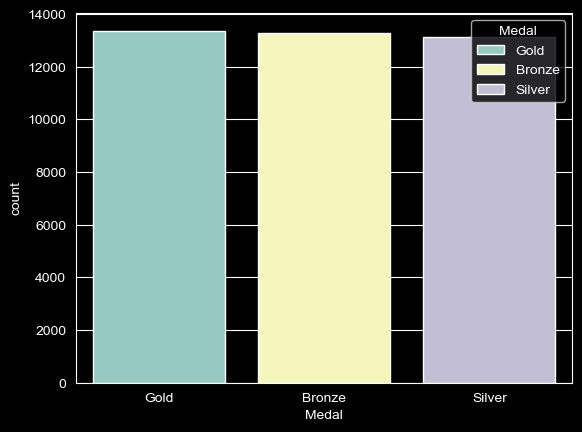

In [39]:
sns.countplot(x='Medal', data=df, hue='Medal')
plt.show()